<a href="https://colab.research.google.com/github/whistle-hikhi/K-nearest-neighbors/blob/main/knn_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Tue Apr  1 03:40:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   50C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
%load_ext cuml.accel

[2025-04-01 03:41:34.850] [CUML] [info] cuML: Installed accelerator for sklearn.
[2025-04-01 03:42:07.989] [CUML] [info] cuML: Installed accelerator for umap.
[2025-04-01 03:42:08.078] [CUML] [info] cuML: Installed accelerator for hdbscan.
[2025-04-01 03:42:08.078] [CUML] [info] cuML: Successfully initialized accelerator.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

In [6]:
np.random.seed(16)

In [11]:
class KNNRegressor:
  def __init__(self):
    self.X = None
    self.y = None
    self.X_train = None
    self.X_test = None
    self.y_train = None
    self.y_test = None
    self.model = None

  def generate_sample_data(self, n=100):
    self.X = np.linspace(0, 10, n).reshape(-1, 1)
    self.y = np.sin(self.X) + np.random.normal(0, 0.1, (n, 1))

  def prepare_data(self, test_size = 0.2):
    self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=test_size, random_state = 16)

  def train_model(self, n_neighbors=5):
    self.model = KNeighborsRegressor(n_neighbors=n_neighbors)
    self.model.fit(self.X_train, self.y_train.ravel())

  def evaluate_model(self):
    y_pred = self.model.predict(self.X_test)

    mse = mean_squared_error(self.y_test, y_pred)
    r2 = r2_score(self.y_test, y_pred)

    print(f"Model evaluation metrics: \nMSE: {mse}\nR2: {r2}")

    return y_pred

  def visualize_data(self, y_pred):
    plt.figure(figsize=(10,6))

    sort_idx = np.argsort(self.X_test.ravel())
    X_test_sorted = self.X_test[sort_idx]
    y_test_sorted = self.y_test[sort_idx]
    y_pred_sorted = y_pred[sort_idx]

    plt.scatter(X_test_sorted, y_test_sorted, color = 'blue', label = 'Actual values', alpha=0.5)
    plt.plot(X_test_sorted, y_pred_sorted, color='red', label='KNN Regressionn Predict', linewidth=2)

    plt.title("KNN Regression: Actual vs Predicted Values")
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


Generating data ...
Preparing data ...
Training model ... 
Evaluating model ...
Model evaluation metrics: 
MSE: 0.013520355464808592
R2: 0.9703171181013251
Visualize data ...


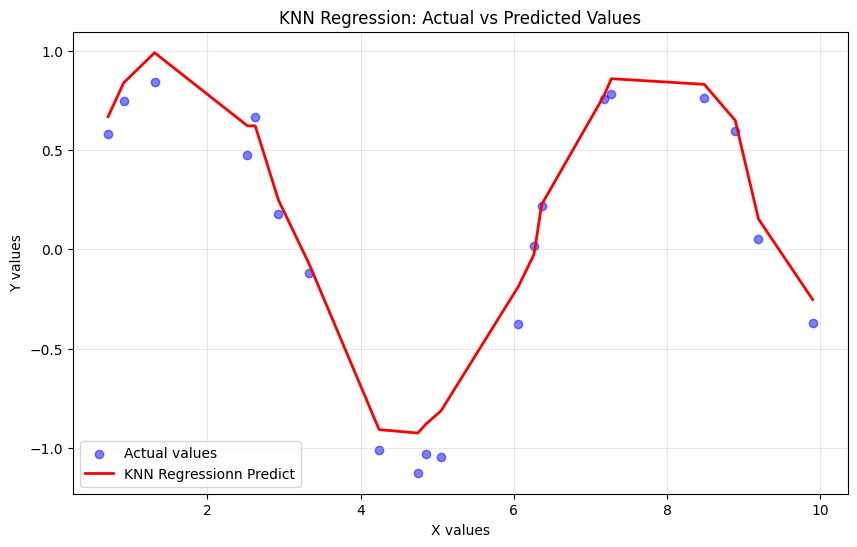

In [12]:
knn = KNNRegressor()

print("Generating data ...")
knn.generate_sample_data()

print("Preparing data ...")
knn.prepare_data()

print("Training model ... ")
knn.train_model(n_neighbors=5)

print("Evaluating model ...")
y_pred = knn.evaluate_model()

print("Visualize data ...")
knn.visualize_data(y_pred)